In [10]:
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
img = Image.open("python/test_img.jpg")

In [6]:
print(type(img), img.mode, img.size)

<class 'PIL.JpegImagePlugin.JpegImageFile'> RGB (3626, 2410)


In [7]:
small_img = img.resize((200, 300))

In [8]:
small_img.save("test_img_small.jpg")

In [9]:
img.thumbnail((200, 300))
img.save("python/test_img_small.jpg")

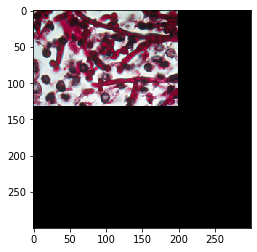

In [13]:
croped_img = img.crop((0, 0, 300, 300))
plt.imshow(croped_img)

# scikit-image

In [19]:
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean

In [20]:
img = io.imread("python/test_img.jpg", as_gray=True)

In [23]:
rescale_img = rescale(img, 1.0/4.0, anti_aliasing=True)

In [24]:
resize_img = resize(img, (200, 200))

In [28]:
downscale_img = downscale_local_mean(img, (4,3))

In [29]:
from skimage.filters import roberts, sobel, scharr, prewitt

In [33]:
edge_reberts = roberts(resize_img)
edge_sobel = sobel(resize_img)
edge_scharr = scharr(resize_img)
edge_prewitt = prewitt(resize_img)

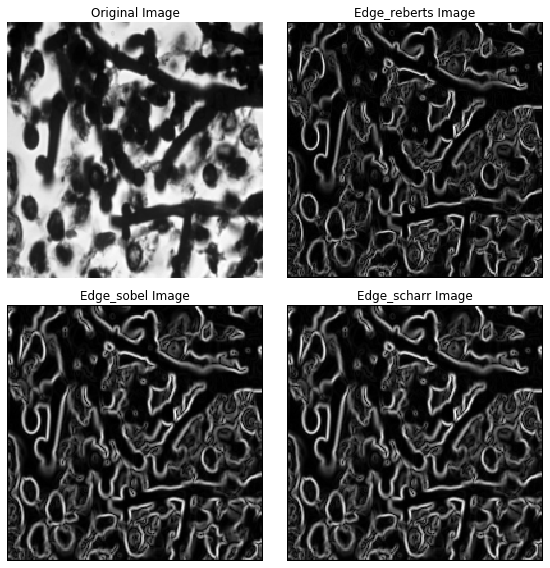

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,8))

ax = axes.ravel()

ax[0].imshow(resize_img, cmap=plt.cm.gray)
ax[0].set_title("Original Image")

ax[1].imshow(edge_reberts, cmap=plt.cm.gray)
ax[1].set_title("Edge_reberts Image")

ax[2].imshow(edge_sobel, cmap=plt.cm.gray)
ax[2].set_title("Edge_sobel Image")

ax[3].imshow(edge_scharr, cmap=plt.cm.gray)
ax[3].set_title("Edge_scharr Image")

for x in ax:
    x.axis("off")
    
plt.tight_layout()
plt.show()

In [46]:
from skimage.feature import canny

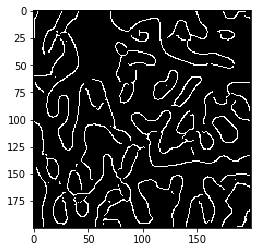

In [53]:
edge_canny = canny(resize_img, sigma=4)
plt.imshow(edge_canny, cmap=plt.cm.gray)

In [64]:
from skimage import restoration
import numpy as np
import scipy.stats as st

In [71]:
psf = gkern(5, 3)
print(psf)

[[0.003765   0.015019   0.02379159 0.015019   0.003765  ]
 [0.015019   0.05991246 0.0949073  0.05991246 0.015019  ]
 [0.02379159 0.0949073  0.15034262 0.0949073  0.02379159]
 [0.015019   0.05991246 0.0949073  0.05991246 0.015019  ]
 [0.003765   0.015019   0.02379159 0.015019   0.003765  ]]


In [72]:
def gkern(kernlen=21, nsig=2):
    lim = kernlen//2 + (kernlen % 2)/2
    x = np.linspace(-lim, lim, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

In [73]:
deconvoled, _ = restoration.unsupervised_wiener(resize_img, psf)

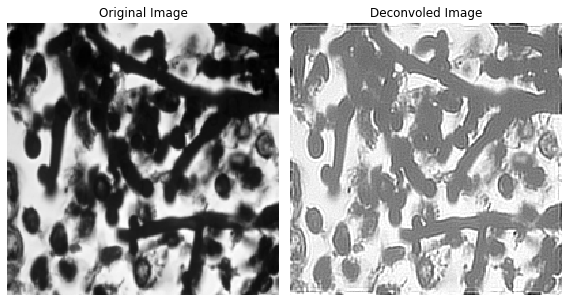

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(8,8))

ax = axes.ravel()

ax[0].imshow(resize_img, cmap=plt.cm.gray)
ax[0].set_title("Original Image")

ax[1].imshow(deconvoled, cmap=plt.cm.gray)
ax[1].set_title("Deconvoled Image")

for x in ax:
    x.axis("off")
    
plt.tight_layout()
plt.show()

In [92]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import try_all_threshold

In [85]:
gab = io.imread("python/gab.PNG", as_gray=True)

In [86]:
entr_img = entropy(gab, disk(3))

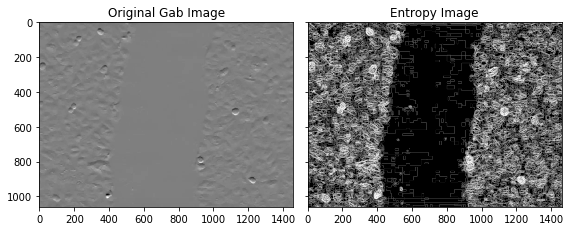

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(8,8))

ax = axes.ravel()

ax[0].imshow(gab, cmap=plt.cm.gray)
ax[0].set_title("Original Gab Image")

ax[1].imshow(entr_img, cmap=plt.cm.gray)
ax[1].set_title("Entropy Image")
    
plt.tight_layout()
plt.show()

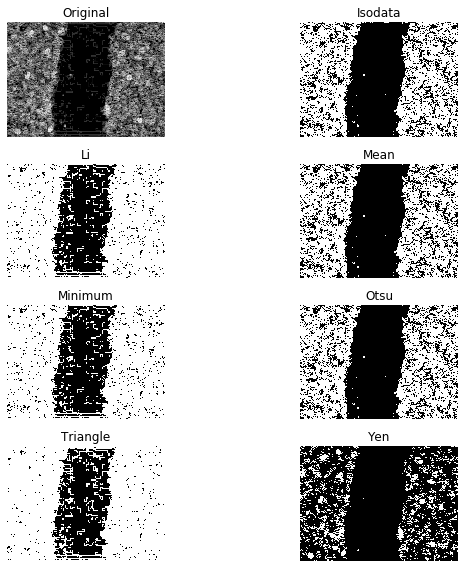

In [95]:
fig, ax = try_all_threshold(entr_img, figsize=(10, 8), verbose=False)
plt.show()

In [96]:
from skimage.filters import threshold_otsu

In [97]:
thresh = threshold_otsu(entr_img)

In [98]:
print(thresh)

1.3757953990107379


In [99]:
binary = entr_img <= thresh

In [101]:
print(binary)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]


(-0.5, 1459.5, 1059.5, -0.5)

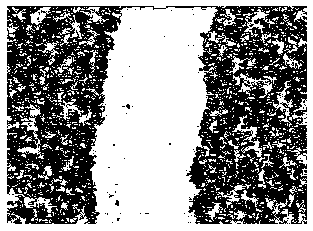

In [103]:
plt.imshow(binary, cmap="gray")
plt.axis("off")